<a href="https://colab.research.google.com/github/brunomoraisnc/breast-cancer-nn-random-forest/blob/master/NN_Breast_Cancer_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Leitura do arquivo

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1EMmkiIGX9cZiFRh0vRnhXxqUFFhV7tTO'
downloaded = drive.CreateFile({'id': file_id})

#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
#@title
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

TESTDATA = StringIO(downloaded.GetContentString())
df = pd.read_csv(TESTDATA, sep=",", header=None, index_col=None)

#df = pd.DataFrame(downloaded)

### Visão Geral

In [0]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Quantidade de ocorrências e tipo de dado

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


#### Gráfico de calor para avaliar correlação

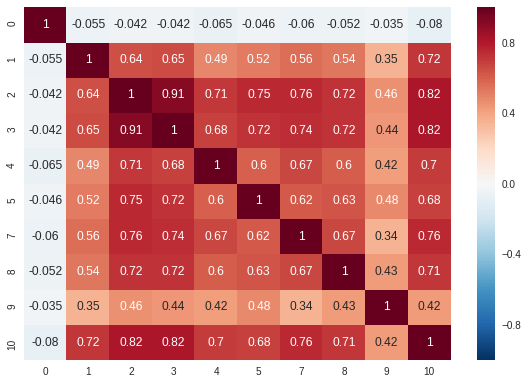

In [0]:
corr = df.corr()

plt.clf()
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

### Limpeza

In [0]:
# Linha 6 com ? para deletar
print(len(df[df[6] == '?']))

16


#### Balanço pós-limpeza

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Segmentação

#### Separação Vetor de características e Classe

In [0]:
X = df.iloc[:,1:10]
y = df.iloc[:,10]

In [0]:
#df.drop(0,axis=1, inplace=True)

##### Checagem

In [0]:
X.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [0]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: 10, dtype: int64

In [0]:
#df.drop_duplicates

#### Treino e teste

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.40, random_state=21)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


##### Ocorrências Treino

In [0]:
print(X_train.info(), '\n')
print('y: ', len(y_train), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 692 to 207
Data columns (total 9 columns):
1    279 non-null int64
2    279 non-null int64
3    279 non-null int64
4    279 non-null int64
5    279 non-null int64
6    279 non-null object
7    279 non-null int64
8    279 non-null int64
9    279 non-null int64
dtypes: int64(8), object(1)
memory usage: 21.8+ KB
None 

y:  279 



##### Ocorrências Teste

In [0]:
print(X_test.info(), '\n')
print('y: ', len(y_test), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 382 to 236
Data columns (total 9 columns):
1    420 non-null int64
2    420 non-null int64
3    420 non-null int64
4    420 non-null int64
5    420 non-null int64
6    420 non-null object
7    420 non-null int64
8    420 non-null int64
9    420 non-null int64
dtypes: int64(8), object(1)
memory usage: 32.8+ KB
None 

y:  420 



In [0]:
#@title
#uploaded = files.upload()
#df = pd.read_csv(io.StringIO(uploaded['bs140513_032310_full.csv'].decode('utf-8')))

### Parametrização

In [0]:
#@title
#from sklearn.model_selection import ParameterGrid

#grid = [{'n_estimators': [10,20,30,40,50,100,200],'max_depth': [3,5,7,13], 'max_features': [3,6,9], 'random_state': [21]}]
#list(ParameterGrid(grid))

#scores = []

#clf = RandomForestClassifier()

#for g in ParameterGrid(grid):
#  clf.set_params(**g)
#  clf.fit(X_train, y_train)
#  predict_test = clf.predict(X_test)
#  scores.append(clf.score(X_test, y_test))

#grid.best_params_
#clf.fit(X_train, y_train)
#clf.score(y_train, clf.predict(X_train))

In [0]:
#@title
#best_index = np.array(scores).argmax()
#print('Melhor configuração: ', ParameterGrid(grid)[24])

#clf2 = RandomForestClassifier(**ParameterGrid(grid)[24])
#clf2.fit(X_train, y_train)

#score_train = clf2.score(X_train, y_train)
#score_test = clf2.score(X_test, y_test)

#print('Melhor resultado em treino: ', score_train)
#print('Melhor resultado em teste: ', score_test)


In [0]:
#@title
#print(max(scores))

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


nn = MLPClassifier()
gridNN = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(2,3,2)], 'solver': ['lbfgs', 'sgd', 'adam'], 'random_state': [21]}

clf_gsearch = GridSearchCV(nn,gridNN, cv=5)
clf_gsearch.fit(X_train, y_train)

sorted(clf_gsearch.cv_results.keys())





ValueError: ignored

### Resto

In [0]:
score = []
clf = RandomForestClassifier(n_estimators=200, max_features=3, max_depth=3, random_state=21)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [0]:
clf.score(X_train, y_train)

0.9743589743589743

In [0]:
clf.score(X_test, y_test)

0.9682926829268292